In [6]:
#import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [7]:
#create the dataframe
df = pd.read_csv('Amazon Prime Video.csv')
df.head(5)

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,The Grand Seduction,Don McKellar,"Brendan Gleeson, Taylor Kitsch, Gordon Pinsent",Canada,30-Mar-21,2014,NaN,113 min,"Comedy, Drama",A small fishing village must procure a local d...
1,s2,Movie,Take Care Good Night,Girish Joshi,"Mahesh Manjrekar, Abhay Mahajan, Sachin Khedekar",India,30-Mar-21,2018,13+,110 min,"Drama, International",A Metro Family decides to fight a Cyber Crimin...
2,s3,Movie,Secrets of Deception,Josh Webber,"Tom Sizemore, Lorenzo Lamas, Robert LaSardo, R...",United States,30-Mar-21,2017,NaN,74 min,"Action, Drama, Suspense",After a man discovers his wife is cheating on ...
3,s4,Movie,Pink: Staying True,Sonia Anderson,"Interviews with: Pink, Adele, BeyoncÃ©, Britne...",United States,30-Mar-21,2014,NaN,69 min,Documentary,"Pink breaks the mold once again, bringing her ..."
4,s5,Movie,Monster Maker,Giles Foster,"Harry Dean Stanton, Kieran O'Brien, George Cos...",United Kingdom,30-Mar-21,1989,NaN,45 min,"Drama, Fantasy",Teenage Matt Banting wants to work with a famo...


In [8]:
#To return no. of rows and no. of columns
df.shape

(9668, 12)

In [9]:
#To get information about the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9668 entries, 0 to 9667
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       9668 non-null   object
 1   type          9668 non-null   object
 2   title         9668 non-null   object
 3   director      7585 non-null   object
 4   cast          8435 non-null   object
 5   country       672 non-null    object
 6   date_added    155 non-null    object
 7   release_year  9668 non-null   int64 
 8   rating        9331 non-null   object
 9   duration      9668 non-null   object
 10  listed_in     9668 non-null   object
 11  description   9668 non-null   object
dtypes: int64(1), object(11)
memory usage: 906.5+ KB


In [10]:
#To return the list of columns
df.columns

Index(['show_id', 'type', 'title', 'director', 'cast', 'country', 'date_added',
       'release_year', 'rating', 'duration', 'listed_in', 'description'],
      dtype='object')

In [11]:
#Check for missing values
df.isnull().sum().sort_values(ascending=False)

date_added      9513
country         8996
director        2083
cast            1233
rating           337
show_id            0
type               0
title              0
release_year       0
duration           0
listed_in          0
description        0
dtype: int64

In [12]:
#To drop show id column
df.drop(['show_id'],axis=1,inplace=True)

In [13]:
#Check for duplicate data
duplicate_data=df.duplicated().any()
print(duplicate_data)

False


In [14]:
#To replace missing values
df['country'].fillna('Missing', inplace = True)
df['date_added'].fillna('Missing', inplace = True)
df['cast'].fillna('Missing', inplace = True)

C:\Users\ADMIN\AppData\Local\Temp\ipykernel_11248\2298781194.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['country'].fillna('Missing', inplace = True)
C:\Users\ADMIN\AppData\Local\Temp\ipykernel_11248\2298781194.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For exam

In [15]:
df["rating"].fillna(df['rating'].mode()[0], inplace = True)
df['director'].fillna(df['director'].mode()[0], inplace = True)

C:\Users\ADMIN\AppData\Local\Temp\ipykernel_11248\11207214.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df["rating"].fillna(df['rating'].mode()[0], inplace = True)
C:\Users\ADMIN\AppData\Local\Temp\ipykernel_11248\11207214.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.



In [16]:
df.isnull().sum()

type            0
title           0
director        0
cast            0
country         0
date_added      0
release_year    0
rating          0
duration        0
listed_in       0
description     0
dtype: int64

In [17]:
#To rename listed_in column
df = df.rename(columns = {"listed_in" : "genre"})
df['genre'] = df['genre'].apply(lambda x : x.split(",")[0])
df.head(5)

,type,title,director,cast,country,date_added,release_year,rating,duration,genre,description
0,Movie,The Grand Seduction,Don McKellar,"Brendan Gleeson, Taylor Kitsch, Gordon Pinsent",Canada,30-Mar-21,2014,13+,113 min,Comedy,A small fishing village must procure a local d...
1,Movie,Take Care Good Night,Girish Joshi,"Mahesh Manjrekar, Abhay Mahajan, Sachin Khedekar",India,30-Mar-21,2018,13+,110 min,Drama,A Metro Family decides to fight a Cyber Crimin...
2,Movie,Secrets of Deception,Josh Webber,"Tom Sizemore, Lorenzo Lamas, Robert LaSardo, R...",United States,30-Mar-21,2017,13+,74 min,Action,After a man discovers his wife is cheating on ...
3,Movie,Pink: Staying True,Sonia Anderson,"Interviews with: Pink, Adele, BeyoncÃ©, Britne...",United States,30-Mar-21,2014,13+,69 min,Documentary,"Pink breaks the mold once again, bringing her ..."
4,Movie,Monster Maker,Giles Foster,"Harry Dean Stanton, Kieran O'Brien, George Cos...",United Kingdom,30-Mar-21,1989,13+,45 min,Drama,Teenage Matt Banting wants to work with a famo...


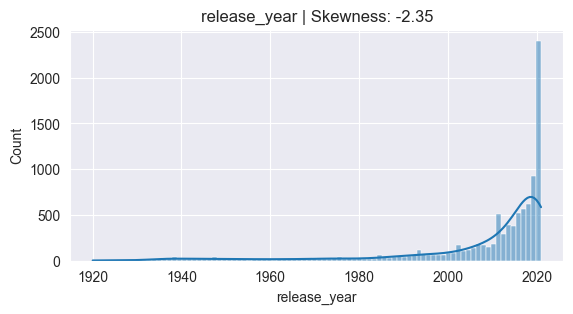

In [18]:
#To check for the distribution of data
# Set Seaborn style
sns.set_style("darkgrid")
 
# Identify numerical columns
numerical_columns = df.select_dtypes(include=["int64", "float64"]).columns
 
# Plot distribution of each numerical feature
plt.figure(figsize=(14, len(numerical_columns) * 3))
for idx, feature in enumerate(numerical_columns, 1):
    plt.subplot(len(numerical_columns), 2, idx)
    sns.histplot(df[feature], kde=True)
    plt.title(f"{feature} | Skewness: {round(df[feature].skew(), 2)}")
 
# Adjust layout and show plots
plt.show() 

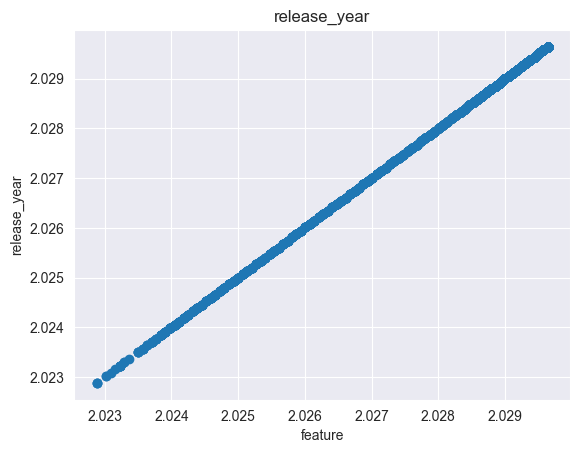

In [19]:
#logarithmic transformation
for feature in numerical_columns:
    data=df.copy()
    if 0 in data[feature].unique():
        pass
    else:
        data[feature]=np.log(data[feature])
        data['release_year']=np.log(data['release_year'])
        plt.scatter(data[feature], data['release_year'])
        plt.xlabel('feature')
        plt.ylabel('release_year')
        plt.title(feature)
        plt.show()
    

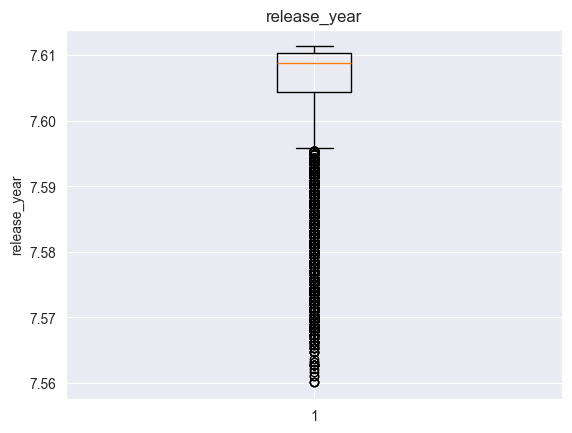

In [20]:
#outliers
for feature in numerical_columns:
    data=df.copy()
    if 0 in data[feature].unique():
        pass
    else:
        data[feature]=np.log(data[feature])
        plt.boxplot(data[feature])
        plt.ylabel(feature)
        plt.ylabel('release_year')
        plt.title(feature)
        plt.show()

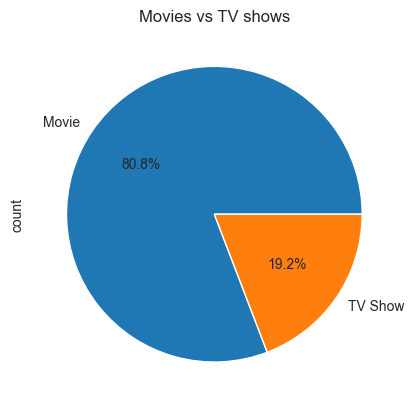

In [36]:
#Percentage of Movies vs TV shows
df.type.value_counts().plot.pie(autopct='%1.1f%%')
plt.title('Movies vs TV shows')
plt.show()

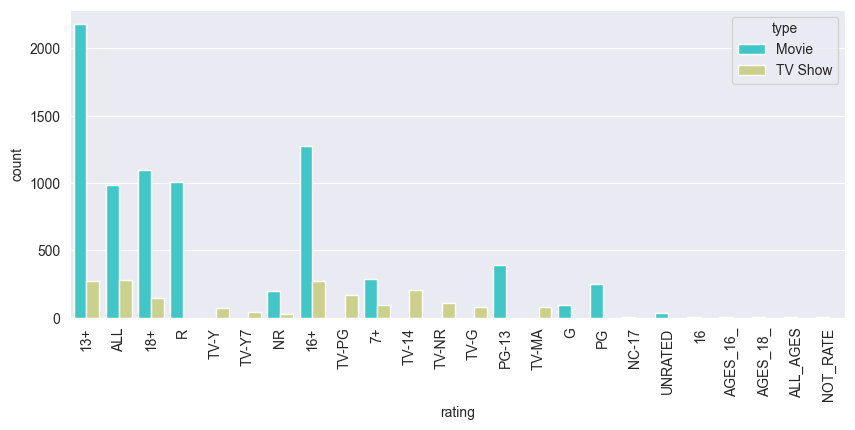

In [15]:
#Distribution of ratings based on movies and TV shows
sns.set_style("darkgrid")
plt.figure(figsize=(10,4))
sns.countplot(x='rating',data=df,hue='type',palette='rainbow')
plt.xticks(rotation=90)
plt.show()

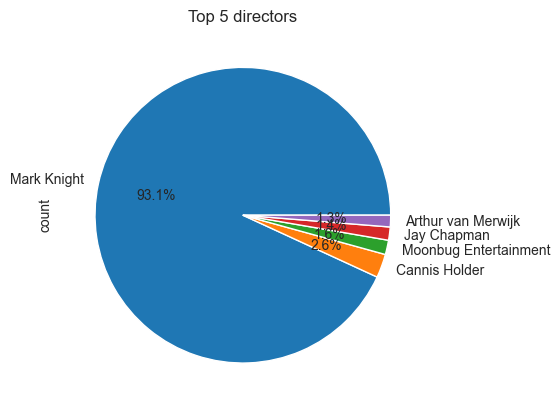

In [16]:
#Top 5 directors
df.director.value_counts()[:5].plot.pie(autopct='%1.1f%%')
plt.title('Top 5 directors')
plt.show()

C:\Users\ADMIN\AppData\Local\Temp\ipykernel_964\2592761611.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(y = filtered_cast, order=filtered_cast.value_counts().index[:10], palette='Set1')


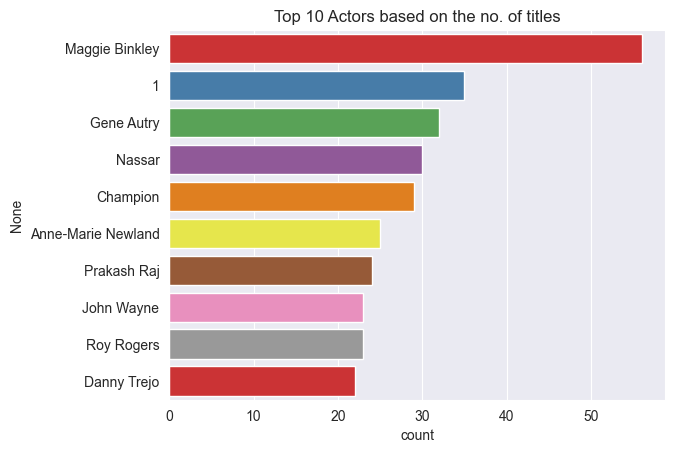

In [17]:
#Top 10 actors based on the no. of titles
plt.title('Top 10 Actors based on the no. of titles')
filtered_cast = df[df.cast != 'Missing'].set_index('title').cast.str.split(', ', expand=True).stack().reindex(level=1)
sns.countplot(y = filtered_cast, order=filtered_cast.value_counts().index[:10], palette='Set1')
plt.show()

C:\Users\ADMIN\AppData\Local\Temp\ipykernel_964\341769594.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  g = sns.countplot(y = filtered_countries, order=filtered_countries.value_counts().index[:15], palette = 'Set2')


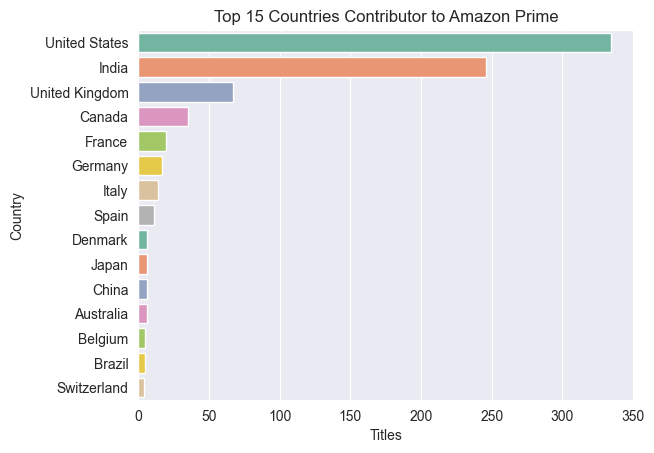

In [18]:
#Top 15 countries
filtered_countries = df.set_index('title').country.str.split(', ', expand=True).stack().reindex(level=1);
filtered_countries = filtered_countries[filtered_countries != 'Missing']
g = sns.countplot(y = filtered_countries, order=filtered_countries.value_counts().index[:15], palette = 'Set2')
plt.title('Top 15 Countries Contributor to Amazon Prime')
plt.xlabel('Titles')
plt.ylabel('Country')
plt.show()

In [19]:
group_genre = df.groupby('type')["release_year"].value_counts()
group_genre

type     release_year
Movie    2021            1139
         2020             736
         2019             730
         2018             438
         2017             404
                         ... 
TV Show  1972               1
         1975               1
         1979               1
         1983               1
         1987               1
Name: count, Length: 159, dtype: int64

In [20]:
df['release_year'].unique()

array([2014, 2018, 2017, 1989, 2016, 1994, 2020, 2019, 2008, 2001, 1941,
       1991, 2005, 2015, 2011, 2013, 1949, 2007, 2002, 1955, 1959, 1983,
       2009, 2012, 2010, 1986, 1988, 1920, 1936, 1992, 2021, 1993, 2006,
       1948, 1946, 1944, 1935, 1985, 1937, 1970, 1945, 1939, 1996, 1997,
       1974, 1938, 1978, 2004, 1943, 1975, 1960, 1934, 1940, 1961, 2003,
       2000, 1967, 1995, 1951, 1932, 1999, 1963, 1969, 1952, 1947, 1929,
       1990, 1925, 1968, 1987, 1942, 1979, 1980, 1981, 1976, 1966, 1973,
       1956, 1972, 1950, 1953, 1982, 1977, 1933, 1958, 1984, 1998, 1924,
       1922, 1926, 1954, 1930, 1971, 1965, 1931, 1923, 1962, 1964, 1957,
       1927], dtype=int64)

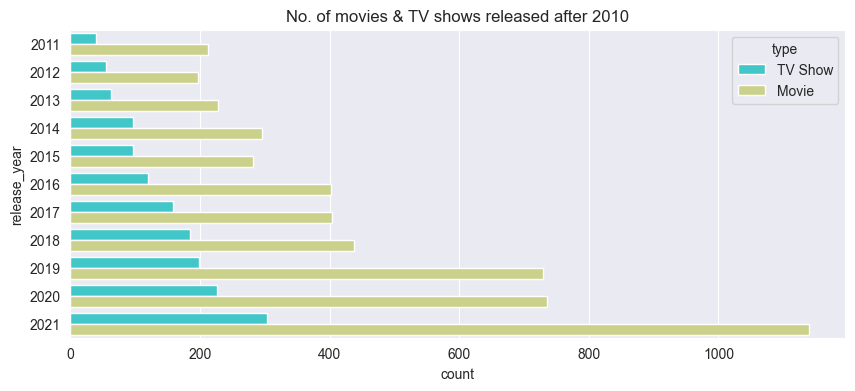

In [21]:
#No. of movies & TV shows released after 2010
sns.set_style("darkgrid")
plt.figure(figsize=(10,4))
sns.countplot(y = "release_year", hue = "type", data=df[df['release_year'] > 2010], palette = "rainbow")
plt.title("No. of movies & TV shows released after 2010")
plt.show()

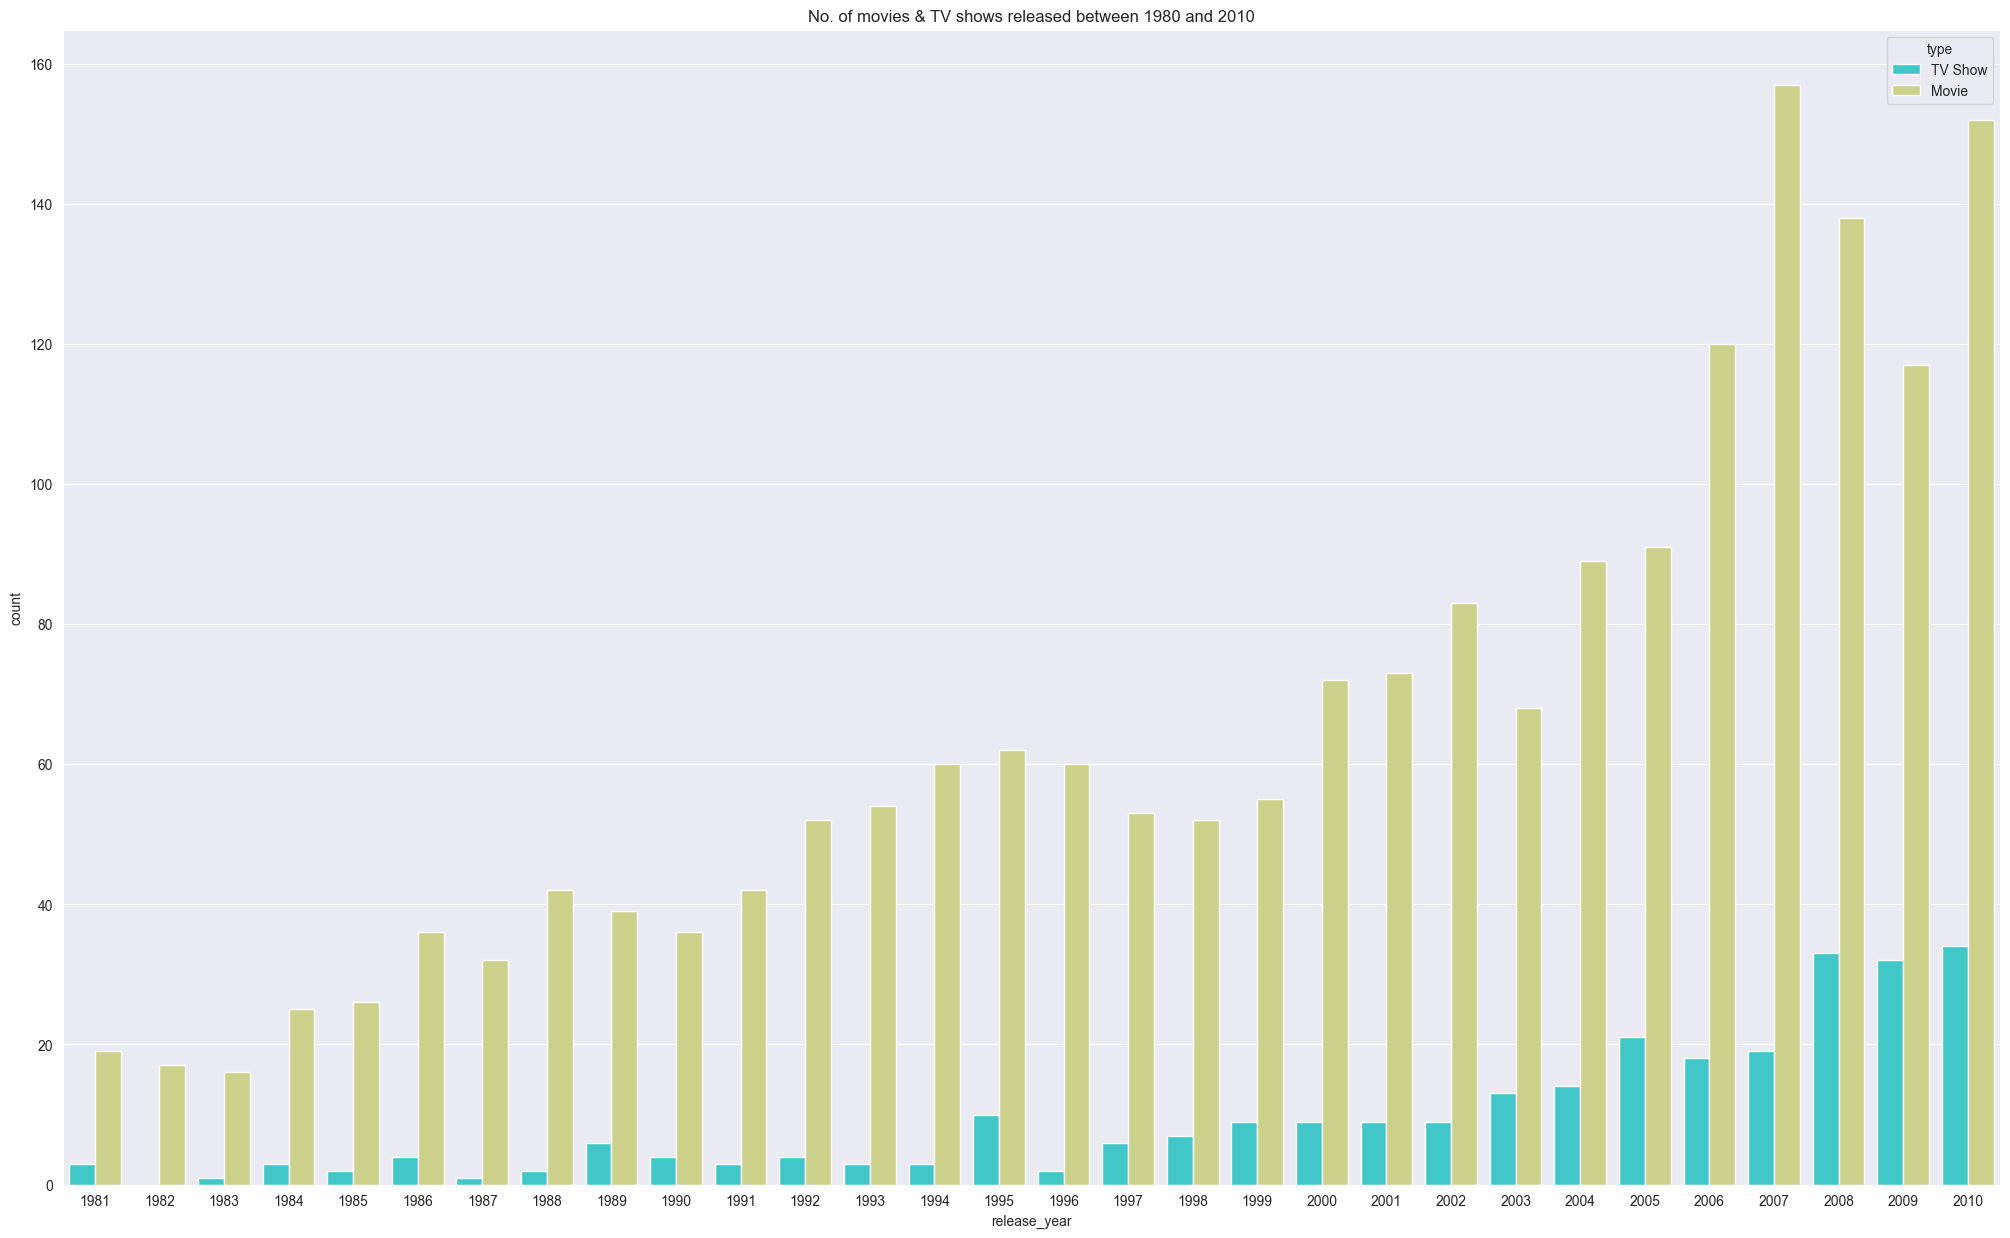

In [22]:
#No. of movies & TV shows released between 1980 and 2010
sns.set_style("darkgrid")
plt.figure(figsize=(25,15))
sns.countplot(x = "release_year", hue = "type", data=df[(df['release_year'] > 1980) & (df['release_year'] <= 2010)], palette = "rainbow")
plt.title("No. of movies & TV shows released between 1980 and 2010")
plt.show()

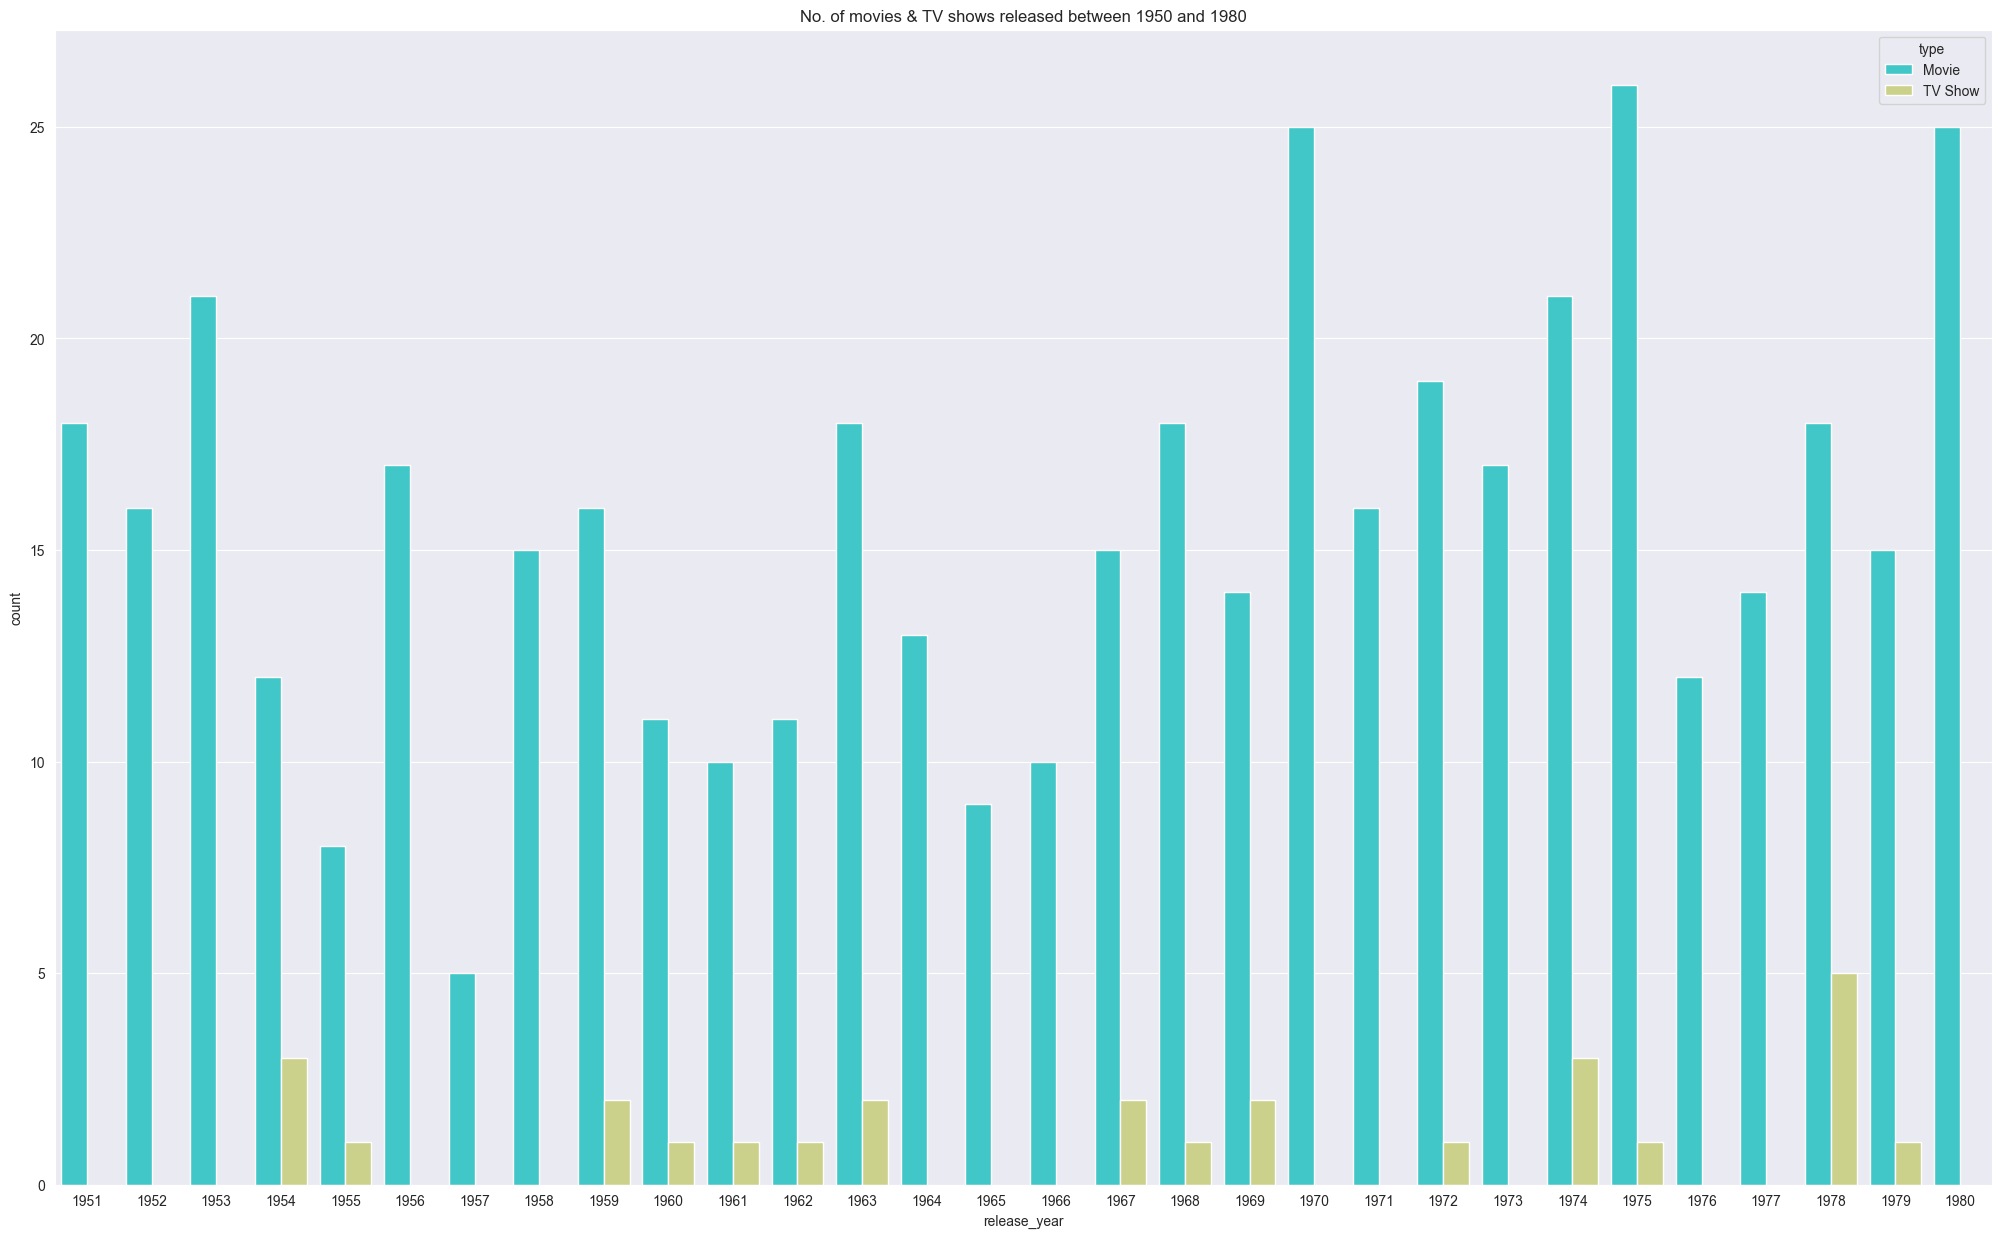

In [23]:
#No. of movies & TV shows released between 1950 and 1980
sns.set_style("darkgrid")
plt.figure(figsize=(25,15))
sns.countplot(x= "release_year", hue = "type", data=df[(df['release_year'] > 1950) & (df['release_year'] <= 1980)], palette = "rainbow")
plt.title("No. of movies & TV shows released between 1950 and 1980")
plt.show()

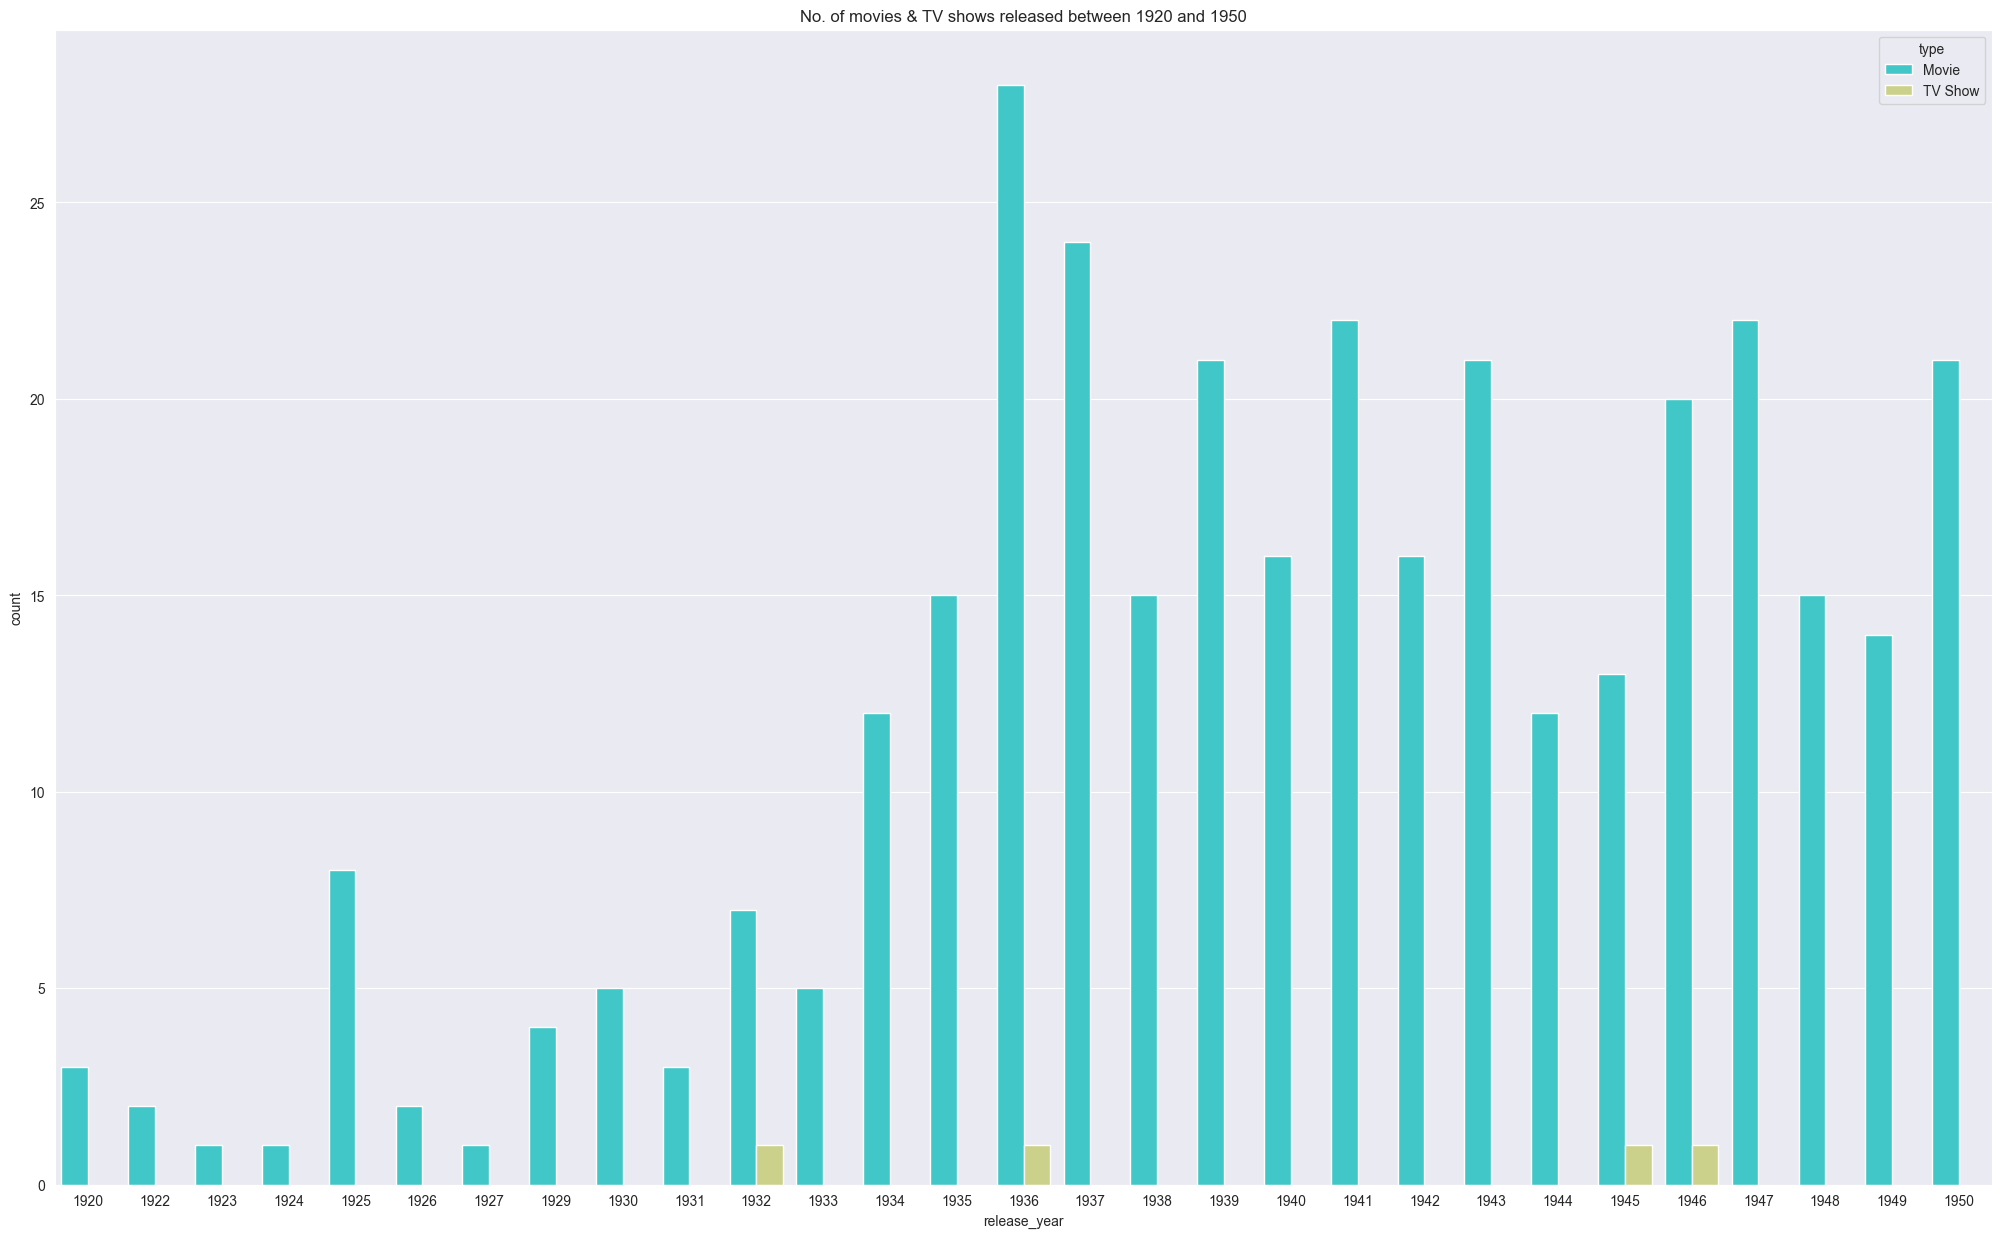

In [24]:
#No. of movies & TV shows released between 1920 and 1950
sns.set_style("darkgrid")
plt.figure(figsize=(25,15))
sns.countplot(x = "release_year", hue = "type", data=df[(df['release_year'] >= 1920) & (df['release_year'] <= 1950)], palette = "rainbow")
plt.title("No. of movies & TV shows released between 1920 and 1950")
plt.show()

Text(0.5, 1.0, 'Distribution of Prime Movies & TV Shows across genres')

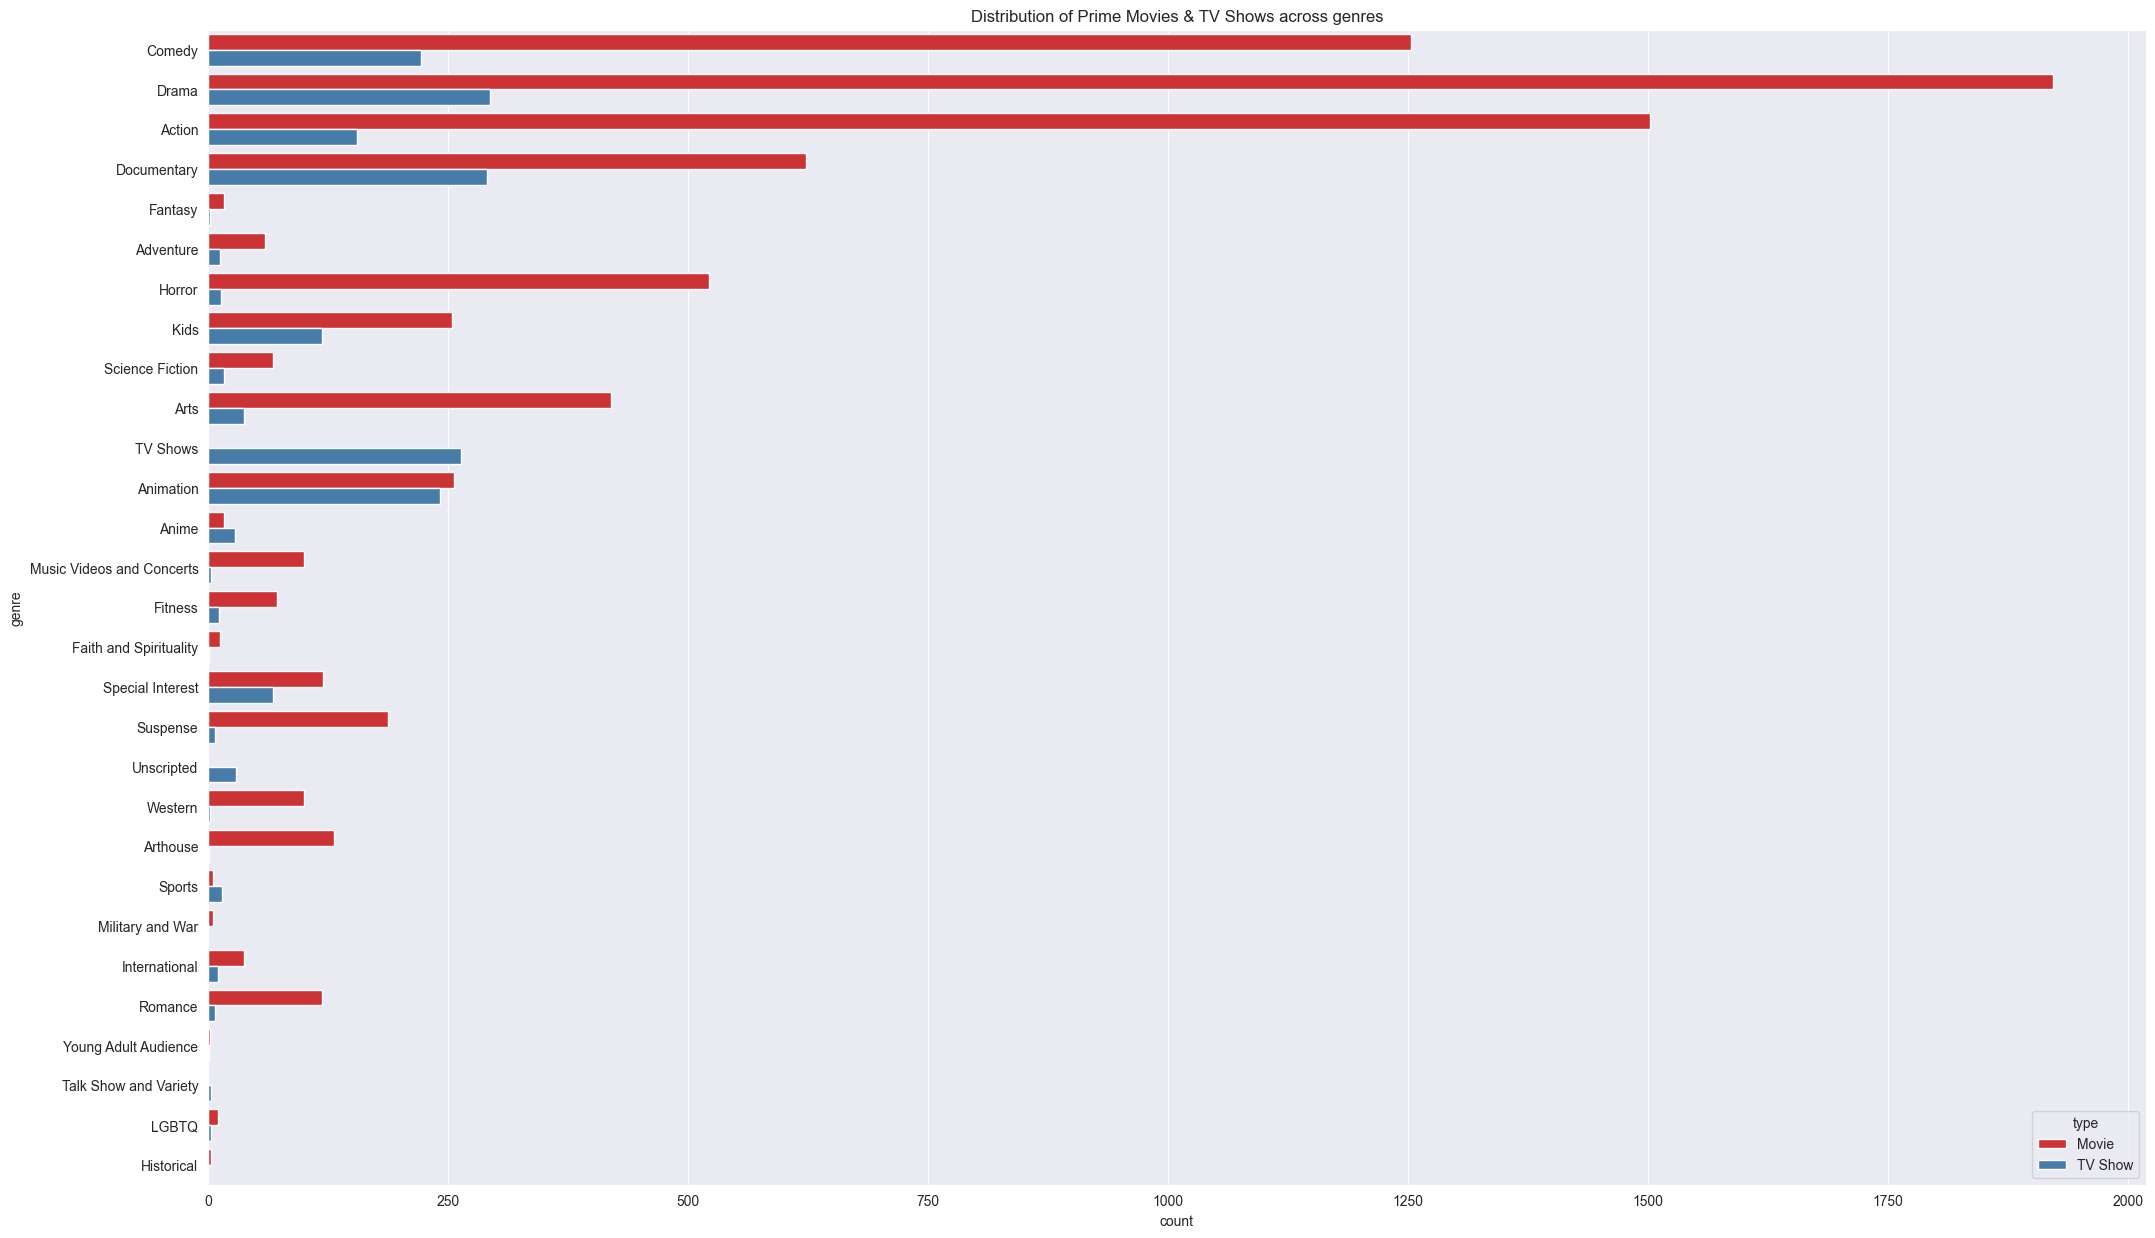

In [25]:
#Distribution of Prime Movies & TV Shows across genres
plt.figure(figsize = (25,15))
sns.countplot(y = "genre", hue = "type", data=df, palette = "Set1")
plt.title("Distribution of Prime Movies & TV Shows across genres")